In [1]:
println("Hello Julia")

Hello Julia


## MCSB Bootcamp Dry
Jun Allard jun.allard@uci.edu

Simulate a transcription factor diffusing inside the cytoplasm, searching for a nuclear pore complex

But this time do it in Julia!

*Ugh do I really need to learn another language?*

In [ ]:
import Pkg; 
Pkg.add("PyPlot")
Pkg.add("Plots")

In [58]:
function simulateNPCCapture()
    
    # numerical parameters
    dt = 0.001 # s
    ntmax = 1e6;
 
    NSample = 2000 # number of samples

    # model parameters
    D = 10 #microns^2/second
    L = 10 # microns
    NPCSize = 0.01 # microns
    NPCLocation = [-L/2,0]

    alpha = sqrt(2*D*dt);

    # data collection
    tCapture = zeros(Float64,NSample);

    for iSample in 1:NSample
    
        # intial condition
        x = [L/2,0];
    
        t = 0;
        for nt in 1:ntmax
        
            # dynamics
            x = x .+ alpha*randn(2,1);
        
            # boundaries
            if x[1]>L/2
                x[1]=L/2;
            elseif x[1]<-L/2
                x[1]=-L/2;
            end
        
            if x[2]>L/2
                x[2]=L/2;
            elseif x[2]<-L/2
                x[2]=-L/2;
            end
        
            # test for NPC capture
            if ( (x[1]-NPCLocation[1])^2 + (x[2]-NPCLocation[2])^2 < NPCSize^2 )
                tCapture[iSample] = t;
                break
            end
                   
            t = t+dt;
        
        end # finished loop through time
    
    end # finished loop through samples
    
    return tCapture
end

simulateNPCCapture (generic function with 1 method)

In [60]:
tCapture = @time simulateNPCCapture()

 40.698176 seconds (624.86 M allocations: 39.107 GiB, 29.10% gc time)


2000-element Array{Float64,1}:
   3.4349999999997327
  45.497999999984664 
   1.9089999999999006
  17.063999999997872 
  24.077000000006443 
  23.21700000000539  
  22.518000000004537 
  31.7330000000158   
 201.6520000005988   
  95.32700000009112  
  35.084000000008935 
  51.17699999997143  
 156.66000000038397  
   ⋮                 
  54.04299999996475  
  37.586000000003104 
  57.172999999957455 
  69.02799999996554  
 135.11900000028112  
  13.561999999997923 
  42.92499999999066  
   6.988000000000668 
 147.10600000033835  
 146.92200000033748  
  37.631000000003    
  60.489999999949724 

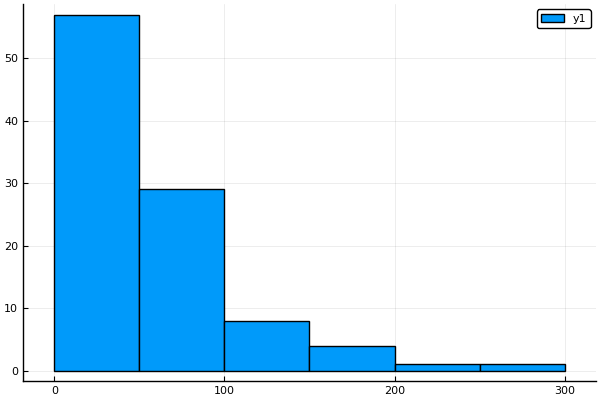

In [56]:
histogram(tCapture)